In [4]:
import numpy as np
import matplotlib.pyplot as plt
from engine import Linear, ReLU, SoftmaxCrossEntropy, MLP

%matplotlib inline

In [ ]:
# We want to make a non-linearity test, if we mark XOR operation as points on paper, it cant lineary separate the classes
# so it has to learn to "bend" space, and if it can't it means our model is cooked (sanity check)

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_indices = np.array([0, 1, 1, 0]) # Indices for one-hot encode

num_classes = 2
y_onehot = np.zeros((4, num_classes))
y_onehot[np.arange(4), y_indices] = 1

print(f"Targets:\n{y_onehot}")

Targets: [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


Starting training for 5000 epochs.
Epoch: 0 | Loss: 1.34421
Epoch: 500 | Loss: 0.09696
Epoch: 1000 | Loss: 0.01733
Epoch: 1500 | Loss: 0.00906
Epoch: 2000 | Loss: 0.00602
Epoch: 2500 | Loss: 0.00447
Epoch: 3000 | Loss: 0.00354
Epoch: 3500 | Loss: 0.00292
Epoch: 4000 | Loss: 0.00248
Epoch: 4500 | Loss: 0.00216
Finished training
Final predictions:
Input: [0 0], Pred: 0, True: 0, Correct: True
Input: [0 1], Pred: 1, True: 1, Correct: True
Input: [1 0], Pred: 1, True: 1, Correct: True
Input: [1 1], Pred: 0, True: 0, Correct: True


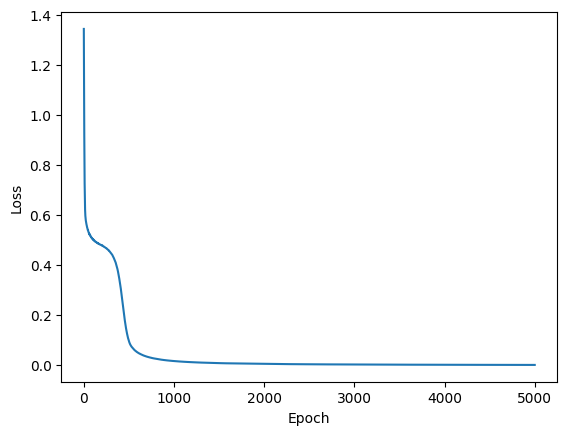

In [ ]:
model = MLP(
    [Linear(2, 4),
    ReLU(),
    Linear(4, 2)]
)

loss_function = SoftmaxCrossEntropy()
learning_rate = 0.1
epochs = 5000

loss_history = []

print(f"Starting training for {epochs} epochs.")

for epoch in range(epochs):
    logits = model.forward(X) # (B, 2), B = 4
    
    loss = loss_function.forward(logits, y_onehot)
    loss_history.append(loss)
    
    dlogits = loss_function.backward()
    model.backward(dlogits)
    
    model.step(learning_rate)
    
    if epoch % 500 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}")
    
print("Finished training")

final_logits = model.forward(X) # (B, 2)
predicted_class = final_logits.argmax(axis=1) # (B)

print("Final predictions:")
for i in range(4):
    input_values = X[i]
    pred = predicted_class[i]  
    true = y_indices[i]
    
    print(f"Input: {input_values}, Pred: {pred}, True: {true}, Correct: {str(pred == true)}")
    
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()